# COMP5318: Assignment 2 - CNN

## 1) Create Hypothesis
## 2) Import Data / Train, Test, Split
## 3) Explore Data - Graphs and Correlations
## 4) Explore Data Distributions
## 5) Normalise and Scale
## 6) Data Preprocessing
## 7) Select Model Features 
## 8) Kfolds 
## 9) Build Models 
## 10) Evaluate models

## 1) Import Statements

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import os
import pickle
import numpy as np
import h5py

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2) Import the data / Train, Test, Split (CF100)

In [0]:
# Choose number of classes and save the model
num_classes = 100
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar100.h5'

### 2.1) Import the Data 

In [0]:
# used to unwrap data
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [0]:
# fine labels
# train data CF100
if True:
  data_train = unpickle('/content/drive/My Drive/Colab Notebooks/Assignment_2/train')
  x_train = data_train[b'data']
  y_train_scalar = np.array(data_train[b'fine_labels'])

In [0]:
# fine labels
if True:
  # test data CF100
  data_test= unpickle('/content/drive/My Drive/Colab Notebooks/Assignment_2/test')
  x_test= data_test[b'data']
  y_test_scalar= np.array(data_test[b'fine_labels'])

In [0]:
# Reshape data to be of shape (n, 32, 32, 3)
x_train_list = [np.transpose(x.reshape(3, 32, 32), (1, 2, 0)) for x in x_train]
x_test_list = [np.transpose(x.reshape(3, 32, 32), (1, 2, 0)) for x in x_test]

x_train = np.array(x_train_list)
x_test = np.array(x_test_list)


In [0]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train_scalar, num_classes)
y_test = keras.utils.to_categorical(y_test_scalar, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

### 2.2) Map English Names to Labels

#### 2.2.1) Training Names

In [0]:
# Preprocess names to take away file extensions
names_train_raw = data_train[b'filenames']

names_train = []

for x in names_train_raw:
  name_str = x.decode("utf-8")
  ic = name_str.find('_s_')
  name = name_str[:ic]
  names_train.append(name)

In [0]:
# make tuple of names to label
l_n_train = [(y_train_scalar[i], x) for i, x in enumerate(names_train)]

In [13]:
print(l_n_train)

[(19, 'bos_taurus'), (29, 'stegosaurus'), (0, 'mcintosh'), (11, 'altar_boy'), (1, 'cichlid'), (86, 'phone'), (90, 'car_train'), (28, 'beaker'), (23, 'fog'), (31, 'rogue_elephant'), (39, 'computer_keyboard'), (96, 'willow_tree'), (82, 'sunflower'), (17, 'palace'), (71, 'adriatic'), (39, 'computer_keyboard'), (8, 'bike'), (97, 'wolf_pup'), (80, 'squirrel'), (71, 'sea'), (74, 'shrew'), (59, 'pine_tree'), (70, 'rose'), (87, 'surveillance_system'), (59, 'pine'), (84, 'table'), (64, 'opossum'), (52, 'quercus_alba'), (42, 'leopard'), (64, 'possum'), (8, 'bike'), (17, 'balmoral_castle'), (47, 'acer_saccharinum'), (65, 'lapin'), (21, 'chimp'), (22, 'clock'), (81, 'streetcar'), (11, 'male_child'), (24, 'oriental_cockroach'), (84, 'breakfast_table'), (78, 'coluber_constrictor'), (45, 'lobster'), (49, 'mount'), (97, 'wolf_pup'), (56, 'areca'), (76, 'skyscraper'), (11, 'boy'), (90, 'train'), (89, 'tractor'), (78, 'snake'), (73, 'shortfin_mako'), (14, 'butterfly'), (87, 'television'), (9, 'beer_bott

#### 2.2.1) Testing Names

In [0]:
# Preprocess names to take away file extensions
names_test_raw = data_test[b'filenames']

names_test = []

for x in names_test_raw:
  name_str = x.decode("utf-8")
  ic = name_str.find('_s_')
  name = name_str[:ic]
  names_test.append(name)

In [0]:
# make tuple of names to label
l_n_test = [(y_test_scalar[i], x) for i, x in enumerate(names_test)]

In [16]:
print(l_n_test)

[(49, 'volcano'), (33, 'woods'), (72, 'seal'), (51, 'mushroom'), (71, 'adriatic_sea'), (92, 'tulipa_clusiana'), (15, 'camel'), (14, 'mourning_cloak'), (23, 'cirrostratus'), (0, 'eating_apple'), (71, 'adriatic'), (75, 'skunk'), (81, 'streetcar'), (69, 'sounding_rocket'), (40, 'lamp'), (43, 'king_of_beasts'), (92, 'tulipa_clusiana'), (97, 'timber_wolf'), (70, 'rose'), (53, 'valencia_orange'), (70, 'mountain_rose'), (49, 'mount'), (75, 'striped_skunk'), (29, 'dinosaur'), (21, 'chimpanzee'), (16, 'oilcan'), (39, 'keyboard'), (8, 'safety_bike'), (8, 'bike'), (70, 'rose'), (20, 'chaise'), (61, 'fishplate'), (41, 'motor_mower'), (93, 'sea_turtle'), (56, 'elaeis_guineensis'), (73, 'mackerel_shark'), (58, 'pickup_truck'), (11, 'boy'), (25, 'sofa'), (37, 'house'), (63, 'hedgehog'), (24, 'oriental_cockroach'), (49, 'alp'), (73, 'shark'), (56, 'palm_tree'), (22, 'clock'), (41, 'lawn_mower'), (58, 'pickup'), (75, 'striped_skunk'), (17, 'palace'), (4, 'beaver'), (6, 'honeybee'), (9, 'soda_bottle'), 

## 3) Explore the Data / Graphs and Correlations

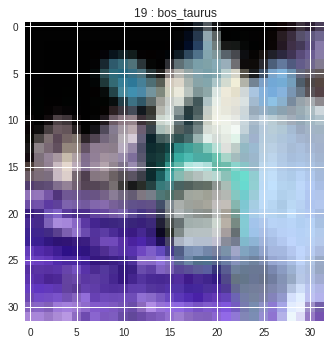

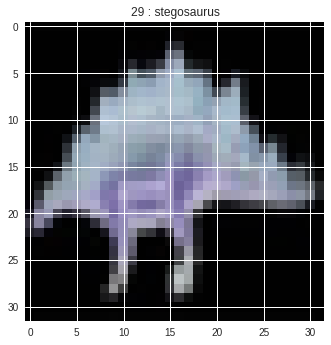

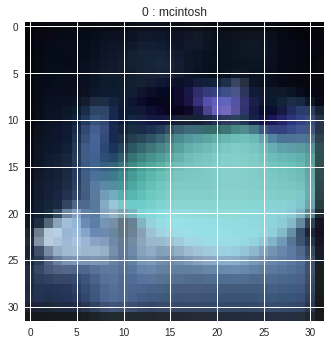

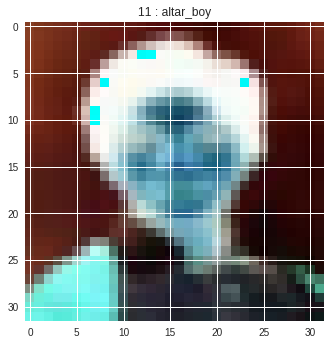

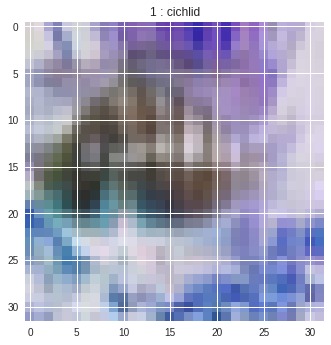

In [17]:
# print out a couple images 
for image, y in zip(x_train[0:5], l_n_train[0:5]):
    label = y[0]
    name = y[1]
    plt.title('{label} : {name}'.format(label=label, name=name))
    plt.imshow(image)
    plt.show()

## 4) Preprocess the data

In [0]:
# decided not to do this because batch processing is better

if False:
  # Normalize the data
  #x_train /= 255.
  #x_test /= 255.

## 5) Take a subset of the data

In [0]:
# take validation set for full data
if True:
  x_validate = x_test[:1000]
  y_validate = y_test[:1000]
  
  # remove from testing
  x_test = x_test[1000:]
  y_test = y_test[1000:]

In [0]:
# take validation set for subset
if False:
  x_validate = x_test[1000:2000]
  y_validate = y_test[1000:2000]

In [64]:
x_validate.shape

(1000, 32, 32, 3)

In [65]:
y_validate.shape

(1000, 100)

In [0]:
# Take Subset of data
if False:
  # take subset of data 10000 train, 1000 test
  x_train = x_train[:10000]
  x_test = x_test[:1000]
  y_train = y_train[:10000]
  y_test = y_test[:1000]

## 6) Setup the Model Graph

In [0]:
# Instantiate the Model
from keras.layers.normalization import BatchNormalization

model = Sequential()

# Convolutional group 1 - 2 conv layers 1 maxpooling
model.add(Conv2D(128, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
# Batch Niormalization
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional group 2 - 2 conv layers 1 maxpooling
model.add(Conv2D(256, (3, 3), padding='same'))
# Batch Normalization
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional group 3 - 2 conv layers 1 maxpooling
model.add(Conv2D(512, (3, 3), padding='same'))
# Batch Normalization
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Dense group - 2 dense layers
model.add(Flatten())
model.add(Dense(1024))
# Batch Normalization
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
  

## 7) CNN

### 7.1) CNN

In [102]:
# Train the model
epochs = 15
num_predictions = 20
batch_size = 64

for i in range(epochs):
  print("Epoch {}/{}".format(i+1, epochs))
  
  model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=1,
            validation_data=(x_validate, y_validate),
            shuffle=True)

Epoch 1/5
Train on 50000 samples, validate on 1000 samples
Epoch 1/1
50000/50000 [==============================] - 70s 1ms/step - loss: 0.8666 - acc: 0.7568 - val_loss: 1.5694 - val_acc: 0.6020
Epoch 2/5
Train on 50000 samples, validate on 1000 samples
Epoch 1/1
50000/50000 [==============================] - 70s 1ms/step - loss: 0.7920 - acc: 0.7757 - val_loss: 1.5800 - val_acc: 0.5960
Epoch 3/5
Train on 50000 samples, validate on 1000 samples
Epoch 1/1
50000/50000 [==============================] - 70s 1ms/step - loss: 0.7204 - acc: 0.7979 - val_loss: 1.5749 - val_acc: 0.5990
Epoch 4/5
Train on 50000 samples, validate on 1000 samples
Epoch 1/1
50000/50000 [==============================] - 70s 1ms/step - loss: 0.6623 - acc: 0.8105 - val_loss: 1.6050 - val_acc: 0.6070
Epoch 5/5
Train on 50000 samples, validate on 1000 samples
Epoch 1/1
50000/50000 [==============================] - 70s 1ms/step - loss: 0.5949 - acc: 0.8312 - val_loss: 1.6523 - val_acc: 0.5910


In [104]:
# Evaluate the Model
evaluation = model.evaluate(x_test, y_test, verbose=1)
print("Model Accuracy: {}".format(evaluation[1]))


9000/9000 [==============================] - 5s 594us/step
Model Accuracy: 0.5834444444444444


### 7.2) CNN + Cross Validation

In [105]:
% time
from sklearn.model_selection import StratifiedKFold

# define 10-fold cross validation test harness
seed = 7
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

# implement k-folds
for train, test in kfold.split(x_train, np.array([np.argmax(x) for x in y_train])):
  
  ###############
  # Create Model#
  ###############
  model = Sequential()

  # Convolutional Layer 1
  model.add(Conv2D(128, (3, 3), padding='same',
                   input_shape=x_train[train].shape[1:]))
  # Batch Niormalization
  model.add(BatchNormalization())
  model.add(Activation('elu'))
  model.add(Conv2D(128, (3, 3)))
  model.add(Activation('elu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  # Convolutional Layer 2
  model.add(Conv2D(256, (3, 3), padding='same'))
  # Batch Normalization
  model.add(BatchNormalization())
  model.add(Activation('elu'))
  model.add(Conv2D(256, (3, 3)))
  model.add(Activation('elu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  # Convolutional Layer 3
  model.add(Conv2D(512, (3, 3), padding='same'))
  # Batch Normalization
  model.add(BatchNormalization())
  model.add(Activation('elu'))
  model.add(Conv2D(512, (3, 3)))
  model.add(Activation('elu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  # Dense Layer
  model.add(Flatten())
  model.add(Dense(1024))
  # Batch Normalization
  model.add(BatchNormalization())
  model.add(Activation('elu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  # initiate RMSprop optimizer
  opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

  # Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  ##############
  
  ##############
  # fit Model  #
  ##############
  
  # Train the model
  epochs = 15
  num_predictions = 20
  batch_size = 64

  for i in range(epochs):
    print("Epoch {}/{}".format(i+1, epochs))

    model.fit(x_train[train], y_train[train],
              batch_size=batch_size,
              epochs=1,
              validation_data=(x_validate, y_validate),
              shuffle=True)
  
  #####################
	# evaluate the model#
  #####################
  
  # Evaluate the Model
  score = model.evaluate(x_train[test], y_train[test], verbose=0)
  print("Model Accuracy: {}".format(score[1]))
  cvscores.append(score[1])

# print the average score
print(np.mean(np.array(cvscores)))
  
  
  
  


CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11.2 µs
Epoch 1/15
Train on 45000 samples, validate on 1000 samples
Epoch 1/1
45000/45000 [==============================] - 65s 1ms/step - loss: 4.1711 - acc: 0.1069 - val_loss: 3.3759 - val_acc: 0.2030
Epoch 2/15
Train on 45000 samples, validate on 1000 samples
Epoch 1/1
45000/45000 [==============================] - 63s 1ms/step - loss: 3.3444 - acc: 0.2163 - val_loss: 2.8673 - val_acc: 0.3080
Epoch 3/15
Train on 45000 samples, validate on 1000 samples
Epoch 1/1
45000/45000 [==============================] - 63s 1ms/step - loss: 2.8908 - acc: 0.2929 - val_loss: 2.5925 - val_acc: 0.3710
Epoch 4/15
Train on 45000 samples, validate on 1000 samples
Epoch 1/1
45000/45000 [==============================] - 63s 1ms/step - loss: 2.5813 - acc: 0.3541 - val_loss: 2.3253 - val_acc: 0.4190
Epoch 5/15
Train on 45000 samples, validate on 1000 samples
Epoch 1/1
45000/45000 [==============================] - 63s 1ms/step - loss: 2.3220 - a

In [107]:
from numpy import mean
# CNN Cross validation Accuracy 

test_accuracy = np.mean(cvscores)
print('average test_accuracy of cross-valiudation is {0:.4f}'.format(mean(test_accuracy)))

average test_accuracy of cross-valiudation is 0.5593


## 6) Confusion matrix

In [108]:
# convert to 1-hot encoding and get model prediction for classification report
a = model.predict(x_test)
b = np.zeros_like(a)
b[np.arange(len(a)), a.argmax(1)] = 1
b[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [109]:
b_scalar = np.array([np.argmax(x) for x in b])
b_scalar

array([63, 23, 94, ..., 51, 42, 70])

In [110]:
y_test_scalar = np.array([np.argmax(y) for y in y_test])
y_test_scalar

array([65, 67, 94, ..., 51, 42, 70])

In [111]:
from sklearn.metrics import classification_report

predictions = b_scalar

print(classification_report(y_test_scalar, b_scalar))

             precision    recall  f1-score   support

          0       0.80      0.76      0.78        88
          1       0.66      0.80      0.72        89
          2       0.47      0.52      0.50        88
          3       0.33      0.39      0.35        93
          4       0.33      0.46      0.38        92
          5       0.43      0.54      0.48        96
          6       0.55      0.55      0.55        85
          7       0.65      0.71      0.68        87
          8       0.76      0.66      0.71        88
          9       0.76      0.59      0.66        90
         10       0.35      0.46      0.40        84
         11       0.48      0.36      0.41        89
         12       0.68      0.61      0.64        90
         13       0.58      0.50      0.54        94
         14       0.69      0.41      0.51        90
         15       0.65      0.34      0.45        87
         16       0.49      0.52      0.51        90
         17       0.86      0.68      0.76   

# END OF CODE